In [1]:
import numpy as np
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp
import optax
import equinox as eqx

from flex import FuzzyVariable
from flex.fiss import TSK
from flex.visualize import plot_mfs

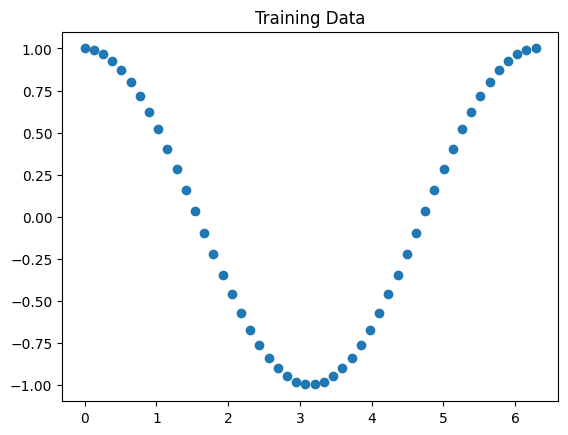

In [2]:
f = lambda x: np.cos(x)

xs = np.linspace(0.0, 2.0*np.pi, 50)
ys = f(xs)

plt.scatter(xs, ys)
plt.title("Training Data")
plt.show()

In [3]:
# define models

minval = 0.0
maxval = 2.0*jnp.pi

order = 0
key = jax.random.PRNGKey(0)

fv_tri = FuzzyVariable.ruspini(5, kind="triangle", name="Triangle FV")
fv_trap = FuzzyVariable.ruspini(5, kind="trapezoid", name="Trapezoid FV")
fv_gauss = FuzzyVariable.gaussian(5, name="Gaussian FV")
fv_mixed = FuzzyVariable.manual(
    mfs=["trapezoid", "gaussian", "triangle", "gaussian", "trapezoid"],
    name="Mixed FV",
)

fis1 = TSK.init((fv_tri,), order=order, key=key, name="Triangle FIS")
fis2 = TSK.init((fv_trap,), order=order, key=key, name="Trapezoid FIS")
fis3 = TSK.init((fv_gauss,), order=order, key=key, name="Gaussian FIS")
fis4 = TSK.init((fv_mixed,), order=order, key=key, name="Mixed FIS")

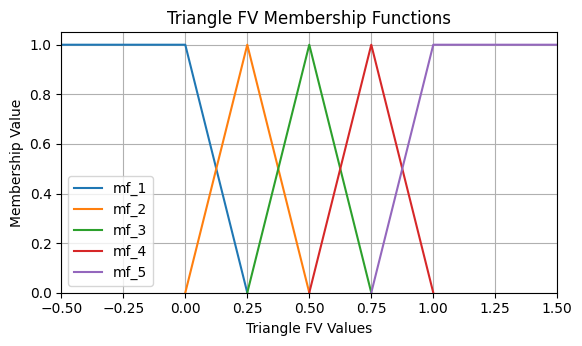

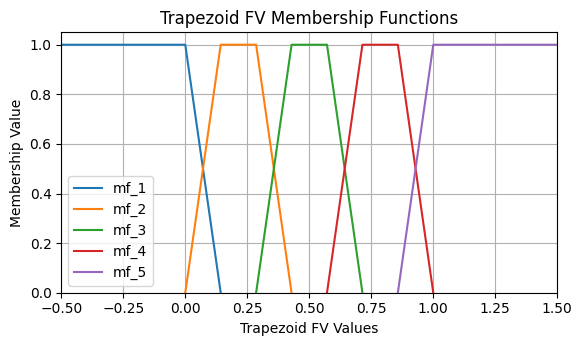

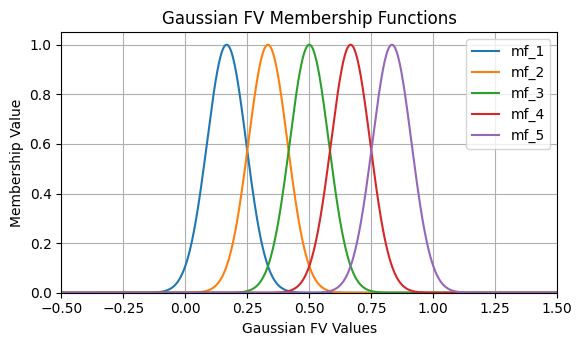

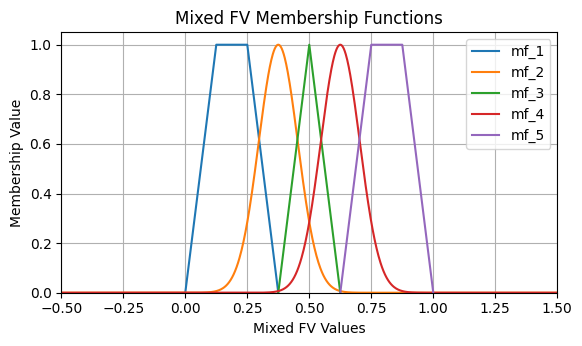

In [4]:
plot_mfs(fv_tri)
plot_mfs(fv_trap)
plot_mfs(fv_gauss)
plot_mfs(fv_mixed)

In [39]:
# Define training parameters
lr = 1e-1
epochs = 500

optim = optax.adam(learning_rate=lr)

@eqx.filter_value_and_grad
def loss_fn(model, x, y):
    pred_y = model(x).squeeze()
    return jnp.mean((y - pred_y)**2)

@eqx.filter_jit
def step(model, x, y, opt_state):
    loss, grads = loss_fn(model, x, y)
    updates, opt_state = optim.update(grads, opt_state)
    model = eqx.apply_updates(model, updates)
    return loss, model, opt_state

train_xs = xs[:, None] / (2.0*np.pi)  # NOTE: last dim must be of the number of inputs

In [40]:
msg = f"Starting Training for {fis1.name}"
print(msg)
print("-"*len(msg))

opt_state = optim.init(fis1)

for epoch in range(epochs):
    loss, fis1, opt_state = step(fis1, train_xs, ys, opt_state)
    loss = loss.item()
    print(f"epoch {epoch+1}/{epochs} | loss={loss}")

print(f"{fis1.name} Training Finished!\n")

Starting Training for Triangle FIS
----------------------------------
epoch 1/500 | loss=0.00336820469237864
epoch 2/500 | loss=0.029084976762533188
epoch 3/500 | loss=0.005312588065862656
epoch 4/500 | loss=0.008941208943724632
epoch 5/500 | loss=0.0180019810795784
epoch 6/500 | loss=0.014638621360063553
epoch 7/500 | loss=0.006829443387687206
epoch 8/500 | loss=0.003524502506479621
epoch 9/500 | loss=0.006457872688770294
epoch 10/500 | loss=0.010280349291861057
epoch 11/500 | loss=0.010209179483354092
epoch 12/500 | loss=0.006935873534530401
epoch 13/500 | loss=0.004004236310720444
epoch 14/500 | loss=0.0037165340036153793
epoch 15/500 | loss=0.005588442087173462
epoch 16/500 | loss=0.007154427468776703
epoch 17/500 | loss=0.006743844132870436
epoch 18/500 | loss=0.004963205195963383
epoch 19/500 | loss=0.003568410873413086
epoch 20/500 | loss=0.003657096531242132
epoch 21/500 | loss=0.00472472608089447
epoch 22/500 | loss=0.005451712291687727
epoch 23/500 | loss=0.00517635140568018


In [41]:
msg = f"Starting Training for {fis2.name}"
print(msg)
print("-"*len(msg))

opt_state = optim.init(fis2)

for epoch in range(epochs):
    loss, fis2, opt_state = step(fis2, train_xs, ys, opt_state)
    loss = loss.item()
    print(f"epoch {epoch+1}/{epochs} | loss={loss}")

print(f"{fis2.name} Training Finished!\n")

Starting Training for Trapezoid FIS
-----------------------------------
epoch 1/500 | loss=0.000866652699187398
epoch 2/500 | loss=0.011296672746539116
epoch 3/500 | loss=0.0009410281199961901
epoch 4/500 | loss=0.005289737600833178
epoch 5/500 | loss=0.007344189565628767
epoch 6/500 | loss=0.0038682403974235058
epoch 7/500 | loss=0.0012351475888863206
epoch 8/500 | loss=0.0020212752278894186
epoch 9/500 | loss=0.00391613133251667
epoch 10/500 | loss=0.0039711580611765385
epoch 11/500 | loss=0.0023410418070852757
epoch 12/500 | loss=0.0010126334382221103
epoch 13/500 | loss=0.0012171872658655047
epoch 14/500 | loss=0.002293019788339734
epoch 15/500 | loss=0.0026977872475981712
epoch 16/500 | loss=0.0019956049509346485
epoch 17/500 | loss=0.0010669238399714231
epoch 18/500 | loss=0.0008456194773316383
epoch 19/500 | loss=0.0013407104415819049
epoch 20/500 | loss=0.0018009910127148032
epoch 21/500 | loss=0.0016717725666239858
epoch 22/500 | loss=0.0011490184115245938
epoch 23/500 | loss=

In [42]:
msg = f"Starting Training for {fis3.name}"
print(msg)
print("-"*len(msg))

opt_state = optim.init(fis3)

for epoch in range(epochs):
    loss, fis3, opt_state = step(fis3, train_xs, ys, opt_state)
    loss = loss.item()
    print(f"epoch {epoch+1}/{epochs} | loss={loss}")

print(f"{fis3.name} Training Finished!\n")

Starting Training for Gaussian FIS
----------------------------------
epoch 1/500 | loss=4.0694139897823334e-05
epoch 2/500 | loss=0.003527653170749545
epoch 3/500 | loss=0.012354065664112568
epoch 4/500 | loss=0.0020912066102027893
epoch 5/500 | loss=0.0037700985558331013
epoch 6/500 | loss=0.00603399146348238
epoch 7/500 | loss=0.002394021488726139
epoch 8/500 | loss=0.0008727906970307231
epoch 9/500 | loss=0.0030495880637317896
epoch 10/500 | loss=0.003792471019551158
epoch 11/500 | loss=0.0016304617747664452
epoch 12/500 | loss=0.00020918513473588973
epoch 13/500 | loss=0.0014968168688938022
epoch 14/500 | loss=0.0025801402516663074
epoch 15/500 | loss=0.001463983440771699
epoch 16/500 | loss=0.00017360367928631604
epoch 17/500 | loss=0.000501754810102284
epoch 18/500 | loss=0.001423737034201622
epoch 19/500 | loss=0.0013670906191691756
epoch 20/500 | loss=0.0005324120866134763
epoch 21/500 | loss=0.00016713317018002272
epoch 22/500 | loss=0.0006582854548469186
epoch 23/500 | loss=

In [43]:
msg = f"Starting Training for {fis4.name}"
print(msg)
print("-"*len(msg))

opt_state = optim.init(fis4)

for epoch in range(epochs):
    loss, fis4, opt_state = step(fis4, train_xs, ys, opt_state)
    loss = loss.item()
    print(f"epoch {epoch+1}/{epochs} | loss={loss}")

print(f"{fis4.name} Training Finished!\n")

Starting Training for Mixed FIS
-------------------------------
epoch 1/500 | loss=0.00019568498828448355
epoch 2/500 | loss=0.030701827257871628
epoch 3/500 | loss=0.0018924357136711478
epoch 4/500 | loss=0.007527737878262997
epoch 5/500 | loss=0.01792846992611885
epoch 6/500 | loss=0.013204405084252357
epoch 7/500 | loss=0.0038839930202811956
epoch 8/500 | loss=0.0005052110063843429
epoch 9/500 | loss=0.004385886248201132
epoch 10/500 | loss=0.008655409328639507
epoch 11/500 | loss=0.008012219332158566
epoch 12/500 | loss=0.003916400950402021
epoch 13/500 | loss=0.0007249364862218499
epoch 14/500 | loss=0.0009254558244720101
epoch 15/500 | loss=0.0033205891959369183
epoch 16/500 | loss=0.004870695527642965
epoch 17/500 | loss=0.004030534066259861
epoch 18/500 | loss=0.0018433232326060534
epoch 19/500 | loss=0.0003961643378715962
epoch 20/500 | loss=0.0007494326564483345
epoch 21/500 | loss=0.0020925726275891066
epoch 22/500 | loss=0.002792557468637824
epoch 23/500 | loss=0.0021515989

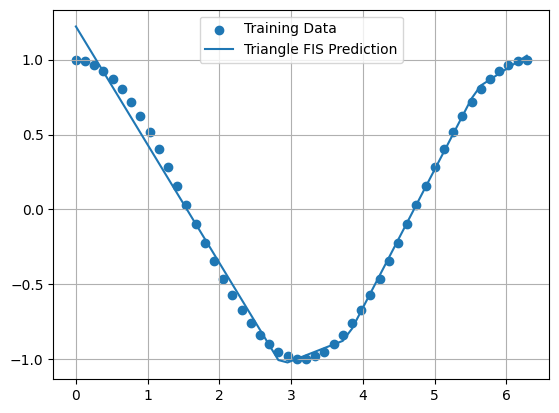

In [44]:
plt.scatter(xs, ys, label="Training Data")
plt.plot(xs, fis1(train_xs), label=f"{fis1.name} Prediction")
plt.grid()
plt.legend()
plt.show()

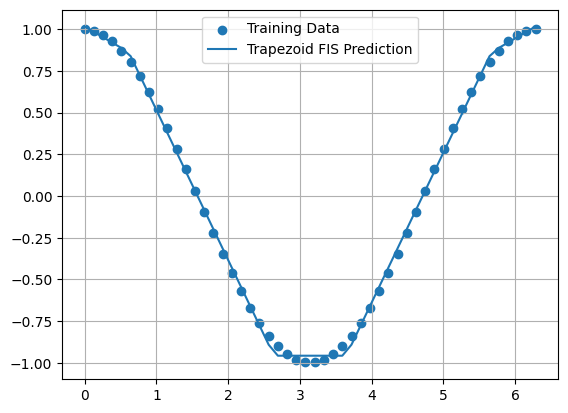

In [45]:
plt.scatter(xs, ys, label="Training Data")
plt.plot(xs, fis2(train_xs), label=f"{fis2.name} Prediction")
plt.grid()
plt.legend()
plt.show()

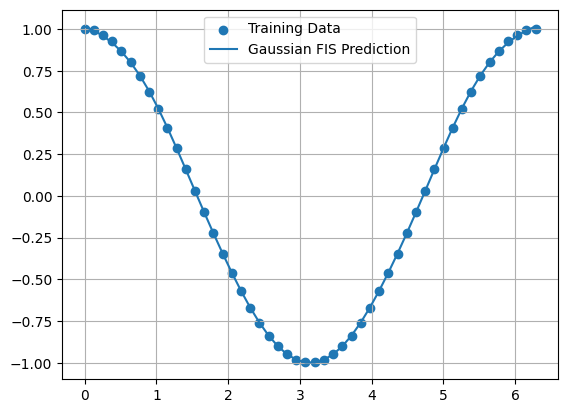

In [46]:
plt.scatter(xs, ys, label="Training Data")
plt.plot(xs, fis3(train_xs), label=f"{fis3.name} Prediction")
plt.grid()
plt.legend()
plt.show()

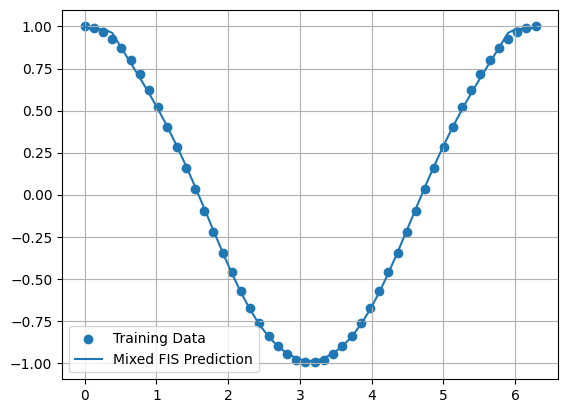

In [47]:
plt.scatter(xs, ys, label="Training Data")
plt.plot(xs, fis4(train_xs), label=f"{fis4.name} Prediction")
plt.grid()
plt.legend()
plt.show()

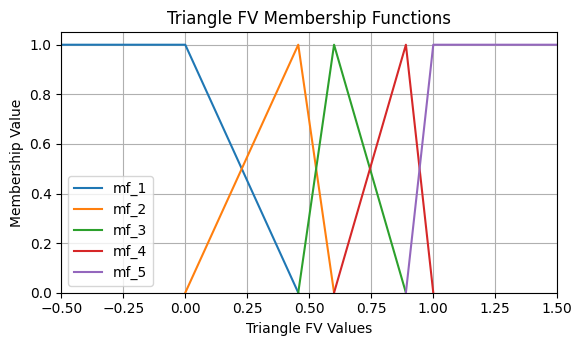

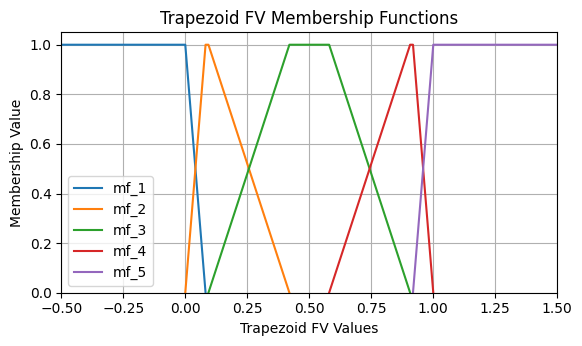

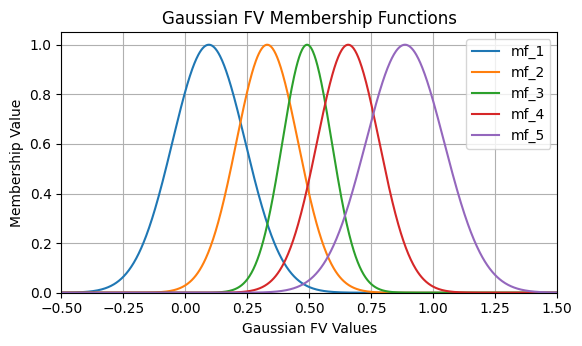

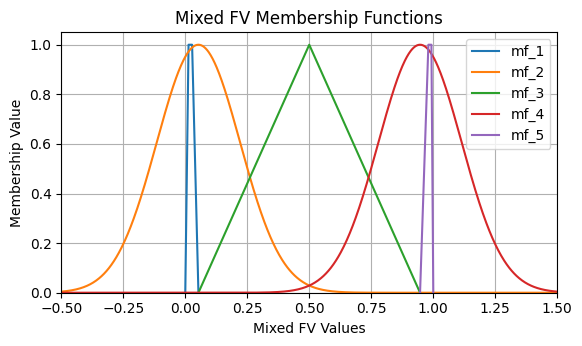

In [48]:
plot_mfs(fis1.input_vars[0])
plot_mfs(fis2.input_vars[0])
plot_mfs(fis3.input_vars[0])
plot_mfs(fis4.input_vars[0])

In [49]:
def count_parameters(model: eqx.Module) -> int:
    leaves = jax.tree_util.tree_leaves(
        eqx.filter(model, eqx.is_array)
    )
    return sum(leaf.size for leaf in leaves)

In [50]:
count_parameters(fis1)

14

In [51]:
count_parameters(fis2)

17

In [52]:
count_parameters(fis3)

21

In [53]:
count_parameters(fis4)

20